# che3le 🔥 - A Neural Network Library

[![GitHub](https://img.shields.io/badge/GitHub-che3le-black)](https://github.com/deeplearning-oop/2425-m1geniomhe-group-1)[![Version](https://img.shields.io/badge/version-1.0.1-grassgreen)](./dev/changelog.md)  ![Build](https://img.shields.io/badge/installation-pip-brightgreen) [![Python](https://img.shields.io/badge/python-3.6+-blue)](https://www.python.org/downloads/release/python-390/)  [![License](https://img.shields.io/badge/license-MIT-orange)](./LICENSE.md)  [![Submission](https://img.shields.io/badge/submission-successful_:\)-yellow)](./docs/readme.md)

This is a demo notebook to portray the performance of out neural network library called `che3le`. For reference please check the [github repository](https://github.com/deeplearning-oop/2425-m1geniomhe-group-1).  

`che3le` is an arabic word used in the lebanese dialect to refer to a "flame" or "torch", pronounced as _"she'le"_

## Set up 🛠

Installing library and importing it

In [3]:
%pip install git+https://github.com/deeplearning-oop/2425-m1geniomhe-group-1.git

  Cloning https://github.com/deeplearning-oop/2425-m1geniomhe-group-1.git to /tmp/pip-req-build-bqgzju51
  Running command git clone --filter=blob:none --quiet https://github.com/deeplearning-oop/2425-m1geniomhe-group-1.git /tmp/pip-req-build-bqgzju51
  Resolved https://github.com/deeplearning-oop/2425-m1geniomhe-group-1.git to commit abad9c8d0ce2c034dbb92d752851770dfa36b179
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [4]:
from che3le.nn.module import Module
from che3le.nn.linear import Linear
from che3le.nn.optimizer import SGD
from che3le.nn.loss import CrossEntropyLoss
from che3le.nn.activation import ReLU, Softmax

from che3le.extensions.dataset import MNIST
from che3le.extensions.dataloader import DataLoader
from che3le.extensions.transforms import Compose, ToTensor, Standardize

import numpy as np
import matplotlib.pyplot as plt

## Load data

In [5]:
# -- using our implemented dataset module
transformation=Compose([ToTensor(), Standardize()])
train_data = MNIST(root='data/', train=True, download=True,transform=transformation)
test_data = MNIST(root='data/', train=False, download=True,transform=transformation)

# -- using our implemented dataloader module
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=32, shuffle=True)

 >>> File downloaded successfully as 'data/MNIST/raw/train-images-idx3-ubyte.gz'.
 >>> File downloaded successfully as 'data/MNIST/raw/train-labels-idx1-ubyte.gz'.
 >>> File downloaded successfully as 'data/MNIST/raw/t10k-images-idx3-ubyte.gz'.
 >>> File downloaded successfully as 'data/MNIST/raw/t10k-labels-idx1-ubyte.gz'.
>>> applying ToTensor()...
 :O already a tensor
>>> applying Standardize(inplace=True)...
>>> [ToTensor(), Standardize(inplace=True)] applied successfully <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
>>>

## Train model

In [6]:
# -- model definition
class Model(Module):
    def __init__(self):
        super().__init__()
        self.linear1 = Linear(28*28,20)
        self.relu=ReLU()
        self.linear2 = Linear(20, 10)
        self.softmax=Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return self.softmax(x)
    
model = Model()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = CrossEntropyLoss()

# -- training

# List to store accuracies from each run
accuracies = []

# Run the experiment 10 times
for run in range(10):
    print(f"Run {run + 1} / 10:")
    
    # -- training loop
    for epoch in range(1):  # You can adjust the number of epochs as needed
        for batch_no, (x, y) in enumerate(train_loader):
            # Flatten the batch (32, 1, 28, 28) to (784, 32)
            x = x.flatten_batch()  # (784, 32)

            optimizer.zero_grad()
            y_hat = model(x)
            loss = loss_fn(y, y_hat)
            loss.backward()
            optimizer.step()
    
    # -- testing
    correct = 0
    total = 0

    for batch_no, (x, y) in enumerate(test_loader):
        x = x.flatten_batch()
        y_hat = model(x)
        predictions = np.argmax(y_hat, axis=0)
        correct += np.sum(predictions == y)
        total += y.data.size
    
    accuracy = correct / total * 100
    accuracies.append(accuracy)
    
    print(f'Accuracy for run {run + 1}: {accuracy:.2f}%')
    print('------------------')

average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy over 10 runs: {average_accuracy:.2f}%')


Run 1 / 10:
Accuracy for run 1: 90.24%
------------------
Run 2 / 10:
Accuracy for run 2: 91.50%
------------------
Run 3 / 10:
Accuracy for run 3: 93.00%
------------------
Run 4 / 10:
Accuracy for run 4: 93.98%
------------------
Run 5 / 10:
Accuracy for run 5: 93.97%
------------------
Run 6 / 10:
Accuracy for run 6: 94.22%
------------------
Run 7 / 10:
Accuracy for run 7: 94.53%
------------------
Run 8 / 10:
Accuracy for run 8: 94.48%
------------------
Run 9 / 10:
Accuracy for run 9: 94.76%
------------------
Run 10 / 10:
Accuracy for run 10: 94.89%
------------------
Average Accuracy over 10 runs: 93.56%


## Evaluate model

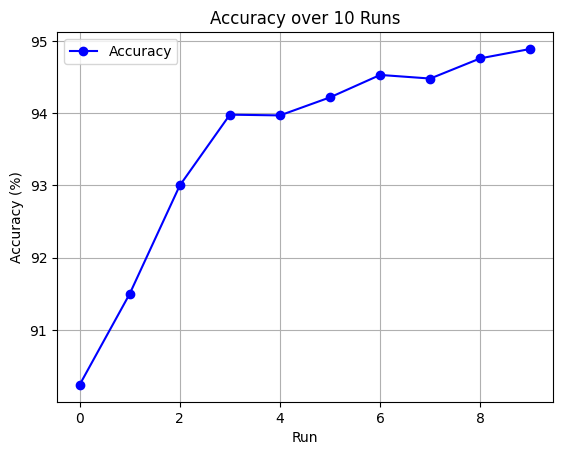

In [8]:
plt.plot(accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title("Accuracy over 10 Runs")
plt.xlabel("Run")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.show()